# 1. Try with Kaggle Data
## Connect with OneDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Data
### CSV Data (Boundary Boxes)

In [3]:
import pandas as pd

csv_path = '/content/drive/MyDrive/FaceDatasetNew/Dataset/faces.csv'
df = pd.read_csv(csv_path)

print(df.head())

     image_name  width  height   x0   y0    x1   y1
0  00001722.jpg   1333    2000  490  320   687  664
1  00001044.jpg   2000    1333  791  119  1200  436
2  00001050.jpg    667    1000  304  155   407  331
3  00001736.jpg    626     417  147   14   519  303
4  00003121.jpg    626     418  462   60   599  166


### Load Images and add Boundary Boxes

In [4]:
import pandas as pd
import cv2
import os

# Path to the images
images_folder_path = '/content/drive/MyDrive/FaceDatasetNew/Dataset/images/'


data = []

# Unique image names
unique_images = df['image_name'].unique()


for i, image_name in enumerate(unique_images):
    image_path = os.path.join(images_folder_path, image_name)

    # See if the picture exists
    if not os.path.exists(image_path):
        print(f"Image does not exist: {image_path}")
        continue

    # Load image
    image = cv2.imread(image_path)

    # Falls nötig, konvertiere von BGR zu RGB (da OpenCV in BGR liest)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Alle Zeilen für das aktuelle Bild erhalten
    rows_for_image = df[df['image_name'] == image_name]

    # Liste, um alle Boxen für das aktuelle Bild zu speichern
    boxes = []

    # Durch alle Zeilen für das aktuelle Bild iterieren
    for _, row in rows_for_image.iterrows():
        # Bounding Box Koordinaten
        box = {'x0': row['x0'], 'y0': row['y0'], 'x1': row['x1'], 'y1': row['y1']}
        boxes.append(box)

    # Daten-Dictionary für das aktuelle Bild erstellen
    image_data = {
        'image_name': image_name,
        'image': image,
        'boxes': boxes,
    }

    # Dictionary zur Liste hinzufügen
    data.append(image_data)

    # Prüfen, ob i + 1 durch 100 teilbar ist und eine Ausgabe erzeugen
    if (i + 1) % 100 == 0:
        print(f"{i + 1} images have been processed.")


100 images have been processed.


KeyboardInterrupt: ignored

In [ ]:
data

### Plot 10 Pictures and Bundary Boxes

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Wähle 10 zufällige Bilder aus
random_images = random.sample(data, 10)

# Erstelle Subplots für die 10 Bilder
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Flache Liste aus Achsen, um leicht durch sie zu iterieren
axs = [ax for ax_sublist in axs for ax in ax_sublist]

# Iteriere durch die ausgewählten Bilder und die dazugehörigen Achsen
for image_data, ax in zip(random_images, axs):
    # Zeige das Bild an
    ax.imshow(image_data['image'])

    # Füge die Boundary-Boxen hinzu
    for box in image_data['boxes']:
        rect = patches.Rectangle(
            (box['x0'], box['y0']),
            box['x1'] - box['x0'],
            box['y1'] - box['y0'],
            linewidth=1,
            edgecolor='r',
            facecolor='none'
        )
        ax.add_patch(rect)

    # Optional: Titel für jedes Subplot
    ax.set_title(image_data['image_name'])

    # Optional: Achsen entfernen
    ax.axis('off')

# Zeige alle Plots an
plt.tight_layout()
plt.show()


Since this dataset from Kaggle is very bad, we will use the dataset which we have annotated.

# 350 Faces Dataset (our own annotation)

## Load the dataset

In [5]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled 

In [6]:
from roboflow import Roboflow

rf = Roboflow(api_key="NTY56w29fWi7uMoyFH9r")
project = rf.workspace("facescv").project("350_faces")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to 350_faces-1 in yolov8:: 100%|██████████| 1692/1692 [00:00<00:00, 5101.99it/s]


In [7]:
dataset

## Review Dataset and Build Image Loading Function

In [8]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth --> to not get too many out of memory errors
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU') #Our GPU is available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Load images into tensorflow data

In [11]:
import tensorflow as tf

train_images = tf.data.Dataset.list_files('350_faces-1/train/images/*.jpg', shuffle=False)
test_images = tf.data.Dataset.list_files('350_faces-1/test/images/*.jpg', shuffle=False)
val_images = tf.data.Dataset.list_files('350_faces-1/valid/images/*.jpg', shuffle=False)

In [12]:
# (Optional) Zeige einen Dateipfad aus dem Dataset an (als Beispiel)
print(train_images.as_numpy_iterator().next())

b'350_faces-1/train/images/00000004_jpg.rf.047a8d1f5f6e2365b1bcef98adba4588.jpg'


In [13]:
def load_image(x):
    # Lese die Bilddatei
    byte_img = tf.io.read_file(x)
    # Dekodiere die Bilddatei in ein Tensor
    img = tf.io.decode_jpeg(byte_img)
    return img

In [14]:
# Verwende die load_image Funktion, um jedes Element im Dataset zu verarbeiten
train_images = train_images.map(load_image)
test_images = test_images.map(load_image)
val_images = val_images.map(load_image)

## Visualize images

In [15]:
# (Optional) Zeige ein Beispielbild aus dem Dataset an
import matplotlib.pyplot as plt

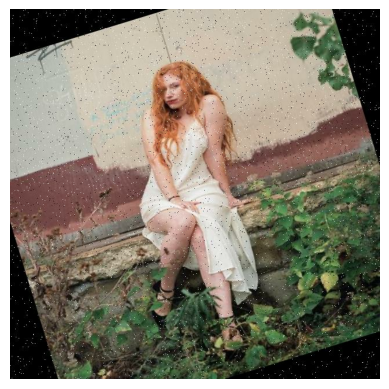

In [16]:
plt.imshow(train_images.as_numpy_iterator().next())
plt.axis('off')
plt.show()

In [17]:
# Zeige den Typ des `images` Objekts
print(type(train_images))

<class 'tensorflow.python.data.ops.map_op._MapDataset'>


In [18]:
# Number of images in our training dataset
num_train_images = sum(1 for _ in train_images)
print(f'There are {num_train_images} images in the train_images dataset.')

num_test_images = sum(1 for _ in test_images)
print(f'There are {num_test_images} images in the test_images dataset.')

num_val_images = sum(1 for _ in val_images)
print(f'There are {num_val_images} images in the val_images dataset.')

There are 735 images in the train_images dataset.
There are 35 images in the test_images dataset.
There are 70 images in the val_images dataset.


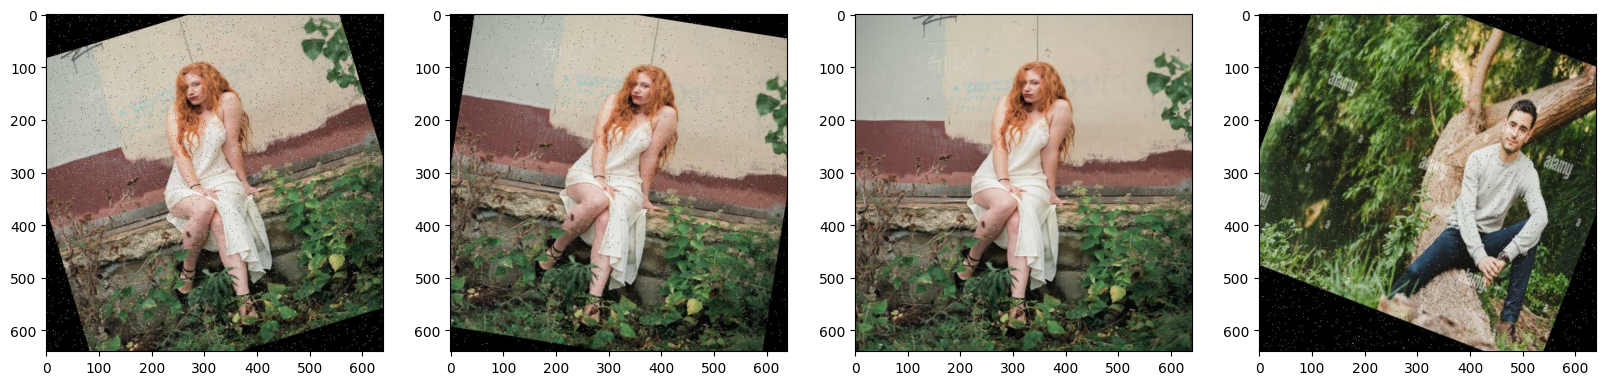

In [19]:
image_generator = train_images.batch(4).as_numpy_iterator()  # 4 images from train_images
plot_images = image_generator.next()  # get next batch of 4 images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))  #to plot the pictures
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()  #show images

In [20]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding="utf-8") as f:
        # Verwenden einer List Comprehension, um alle Zeilen der Datei zu verarbeiten.
        labels = [
            tuple(map(float, line.strip().split()))
            for line in f.readlines()
        ]

    # Extrahiere Klassen-IDs und BBox-Koordinaten in separate Listen
    class_ids, bboxes = zip(*[(int(class_id), (x, y, width, height)) for class_id, x, y, width, height in labels])

    # Rückgabe der Daten
    return class_ids, bboxes


In [21]:
train_labels = tf.data.Dataset.list_files('350_faces-1/train/labels/*.txt', shuffle=False)
print(train_labels.as_numpy_iterator().next())
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.int32, tf.float32]))
print(train_labels.as_numpy_iterator().next())

b'350_faces-1/train/labels/00000004_jpg.rf.047a8d1f5f6e2365b1bcef98adba4588.txt'
(array([0], dtype=int32), array([[0.4453125, 0.21875  , 0.121875 , 0.1515625]], dtype=float32))


In [22]:
test_labels = tf.data.Dataset.list_files('350_faces-1/test/labels/*.txt', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.int32, tf.float32]))

val_labels = tf.data.Dataset.list_files('350_faces-1/valid/labels/*.txt', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.int32, tf.float32]))


## Combining Label and Image Samples

In [23]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(735, 735, 35, 35, 70, 70)

In [24]:
first_image, first_label = next(iter(zip(train_images, train_labels)))
print(f"Type of first_image: {type(first_image)}, Type of first_label: {type(first_label)}")
print(f"First image data: {first_image}, First label data: {first_label}")


Type of first_image: <class 'tensorflow.python.framework.ops.EagerTensor'>, Type of first_label: <class 'tuple'>
First image data: [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 8  8  8]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[17 17 17]
  [ 0  0  0]
  [20 20 20]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 6  6  6]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]], First label data: (<tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.4453125, 0.21875  , 0.121875 , 0.1515625]], dtype=float32)>)


In [25]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(1000)

In [26]:
train.as_numpy_iterator().next()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 (array([0], dtype=int32),
  array([[0.628125  , 0.18359375, 0.2234375 , 0.2078125 ]], dtype=float32)))

In [80]:
train = train.padded_batch(
    batch_size=8,  # Ihre Batch-Größe
    padded_shapes=(
        [None, None, None, None],  # Paddingsform für Ihre Bilder
        (
            [None],  # Paddingsform für Ihre Label-Kategorien
            [None, 1]  # Paddingsform für Ihre Bounding Boxes
        )
    ),
    padding_values=(
        np.uint8(0),  # Paddingwert für Ihre Bilder
        (
            np.int32(0),  # Paddingwert für Ihre Label-Kategorien
            np.float32(0.0)  # Paddingwert für Ihre Bounding Boxes
        )
    )
)
train = train.prefetch(4)



ValueError: ignored

In [28]:
#train = tf.data.Dataset.zip((train_images, train_labels))
#train = train.shuffle(1000)
#train = train.padded_batch(8)
#train = train.prefetch(4)

In [29]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, None), dtype=tf.uint8, name=None), (TensorSpec(shape=(None, None), dtype=tf.int32, name=None), TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)))>

In [30]:
#test = tf.data.Dataset.zip((test_images, test_labels))
#test = test.shuffle(1300)
#test = test.batch(8)
#test = test.prefetch(4)

In [31]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.padded_batch(
    batch_size=8,  # Ihre Batch-Größe
    padded_shapes=(
        [None, None, None],  # Paddingsform für Ihre Bilder
        (
            [None],  # Paddingsform für Ihre Label-Kategorien
            [None, 4]  # Paddingsform für Ihre Bounding Boxes
        )
    ),
    padding_values=(
        np.uint8(0),  # Paddingwert für Ihre Bilder
        (
            np.int32(0),  # Paddingwert für Ihre Label-Kategorien
            np.float32(0.0)  # Paddingwert für Ihre Bounding Boxes
        )
    )
)
test = test.prefetch(4)

In [32]:
#val = tf.data.Dataset.zip((val_images, val_labels))
#val = val.shuffle(1300)
#val = val.batch(8)
#val = val.prefetch(4)

In [33]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1300)
val = val.padded_batch(
    batch_size=8,  # Ihre Batch-Größe
    padded_shapes=(
        [None, None, None],  # Paddingsform für Ihre Bilder
        (
            [None],  # Paddingsform für Ihre Label-Kategorien
            [None, 4]  # Paddingsform für Ihre Bounding Boxes
        )
    ),
    padding_values=(
        np.uint8(0),  # Paddingwert für Ihre Bilder
        (
            np.int32(0),  # Paddingwert für Ihre Label-Kategorien
            np.float32(0.0)  # Paddingwert für Ihre Bounding Boxes
        )
    )
)
val = val.prefetch(4)

In [34]:
train.as_numpy_iterator().next()

(array([[[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         ...,
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  7,   7,   7],
          ...,
          [  0,   0,   0],
          [  4,   4,   4],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [ 12,  12,  12],
          [  0,   0,   0],
          ...,
          [  3,   3,   3],
          [  6,   6,   6],
          [  0,   0,   0]],
 
         [[  1,   1,   1],
          [  0,   0,   0],
          [  2,   2,   2],
   

In [35]:
train.as_numpy_iterator().next()[0].shape

(8, 640, 640, 3)

In [36]:
data_samples = train.as_numpy_iterator()

In [37]:
res = data_samples.next()
res

(array([[[[ 46,  19,  74],
          [ 44,  17,  72],
          [ 41,  14,  69],
          ...,
          [ 58,  14,  73],
          [ 65,  21,  80],
          [ 67,  23,  82]],
 
         [[ 41,  14,  69],
          [ 44,  17,  72],
          [ 48,  21,  76],
          ...,
          [ 84,  40,  99],
          [ 84,  40,  99],
          [ 82,  38,  97]],
 
         [[ 46,  19,  74],
          [ 48,  21,  76],
          [ 52,  25,  80],
          ...,
          [ 80,  36,  95],
          [ 77,  32,  91],
          [ 71,  26,  85]],
 
         ...,
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
   

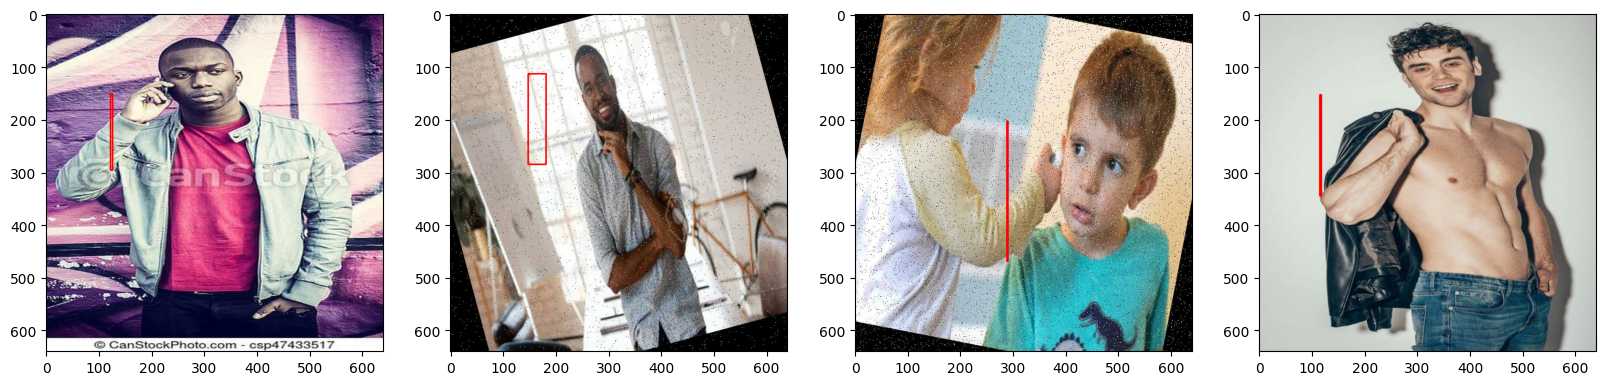

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx].copy()  # Verwenden Sie .copy(), um das Originalbild unverändert zu lassen
    sample_coords = res[1][1][idx]

    # Wenn sample_coords die Form (1, 4) hat, müssen Sie möglicherweise über diese iterieren.
    for coord in sample_coords:
        # Konvertieren der Koordinaten
        ymin, xmin, ymax, xmax = np.multiply(coord, [640, 640, 640, 640]).astype(int)

        # Umwandlung in [x, y, width, height]
        x = xmin
        y = ymin
        width = xmax - xmin
        height = ymax - ymin

        # Zeichnen des Rechtecks
        cv2.rectangle(sample_image, (x, y), (x + width, y + height), (255,0,0), 2)

    ax[idx].imshow(sample_image)





# Build Deep Learning

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [40]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [41]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [48]:
def build_model():
    input_layer = Input(shape=(640,640,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=regress2)
    return facetracker

In [49]:
facetracker = build_model()

In [50]:
facetracker.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 640, 640, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
 dense_2 (Dense)             (None, 2048)              1050624   
                                                                 
 dense_3 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 15773508 (60.17 MB)
Trainable params: 15773508 (60.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [77]:
X, y = train.as_numpy_iterator().next()

In [52]:
X.shape

(8, 640, 640, 3)

In [78]:
y

(array([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int32),
 array([[[0.4546875 , 0.19296876, 0.11875   , 0.125     ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],
 
        [[0.259375  , 0.1890625 , 0.06953125, 0.14921875],
         [0.6273438 , 0.31953126, 0.08203125, 0.12109375],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],
 
        [[0.7328125 , 0.48203126, 0.296875  , 0.40625   ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],
 
        [[0.48125   , 0.23359375, 0.15234375, 0.31015626],
         [0.        , 0.        ,

In [53]:
y.shape

AttributeError: ignored

In [54]:
coords = facetracker.predict(X)
coords  #just for testing, I knwo that the model is not trained yet

1/1 [==============================] - 16s 16s/step


array([[1.0000000e+00, 1.5838024e-09, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.4309858e-09, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 3.8247523e-11, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.3919472e-03, 9.9999952e-01, 1.0000000e+00],
       [1.0000000e+00, 1.5008879e-04, 1.0000000e+00, 9.9996495e-01],
       [1.0000000e+00, 9.8067117e-01, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 5.9993857e-07, 1.0000000e+00, 1.0000000e+00]],
      dtype=float32)

## Define Losses and Optimizers

In [55]:
len(train)

92

In [56]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [57]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [68]:
# distance between our actual coord and our predicted coords
def localization_loss(y_true, yhat):
    print(y_true)
    print(y_true[:,:2])
    print(yhat)
    print(yhat[:,:2])
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [70]:
regressloss = localization_loss

In [76]:
y[1]

array([[[0.55859375, 0.11328125, 0.12578125, 0.13359375],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.5835937 , 0.15625   , 0.1515625 , 0.1375    ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.59375   , 0.17890625, 0.26484376, 0.2453125 ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.5296875 , 0.21484375, 0.08671875, 0.13125   ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.2765625 , 0.278125  , 0.07890625, 0.0921875 ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.40390626, 0.33828124, 0.2265625 , 0.421875  ],
        [0.48046875, 0.11328125, 0.2484375 , 0.2265625 ]],

       [[0.45390624, 0.40546876, 0.7203125 , 0.684375  ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.39765626, 0.27265626, 0.4953125 , 0.4640625 ],
        [0.        , 0.        , 0.        , 0.        ]]], dtype=float32)

In [74]:
y[1].shape

(8, 2, 4)

In [75]:
coords.shape

(8, 4)

In [71]:
localization_loss(y[1], coords).numpy()  #Test

[[[0.55859375 0.11328125 0.12578125 0.13359375]
  [0.         0.         0.         0.        ]]

 [[0.5835937  0.15625    0.1515625  0.1375    ]
  [0.         0.         0.         0.        ]]

 [[0.59375    0.17890625 0.26484376 0.2453125 ]
  [0.         0.         0.         0.        ]]

 [[0.5296875  0.21484375 0.08671875 0.13125   ]
  [0.         0.         0.         0.        ]]

 [[0.2765625  0.278125   0.07890625 0.0921875 ]
  [0.         0.         0.         0.        ]]

 [[0.40390626 0.33828124 0.2265625  0.421875  ]
  [0.48046875 0.11328125 0.2484375  0.2265625 ]]

 [[0.45390624 0.40546876 0.7203125  0.684375  ]
  [0.         0.         0.         0.        ]]

 [[0.39765626 0.27265626 0.4953125  0.4640625 ]
  [0.         0.         0.         0.        ]]]
[[[0.55859375 0.11328125 0.12578125 0.13359375]
  [0.         0.         0.         0.        ]]

 [[0.5835937  0.15625    0.1515625  0.1375    ]
  [0.         0.         0.         0.        ]]

 [[0.59375    0.1789

ValueError: ignored

## Train Neural Network

In [61]:
class FaceTracker(Model):
    def __init__(self, facetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            coords = self.model(X, training=True)

            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        coords = self.model(X, training=False)

        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss

        return {"total_loss":total_loss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [62]:
model = FaceTracker(facetracker)

In [63]:
model.compile(opt, regressloss)

## Train

In [64]:
logdir='logs'

In [65]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [66]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, None), dtype=tf.uint8, name=None), (TensorSpec(shape=(None, None), dtype=tf.int32, name=None), TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)))>

In [69]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


ValueError: ignored

Wenn Ihre Daten jedoch unstrukturiert sind (z.B. unterschiedliche Mengen von Gesichtern in verschiedenen Bildern), kann dies zu Problemen beim Batchen führen, da TensorFlow feste Tensor-Größen für das Training erwartet. Hier sind einige mögliche Lösungen: